In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

# 変分推論

2次元正規分布を変分推論を用いて推定する.

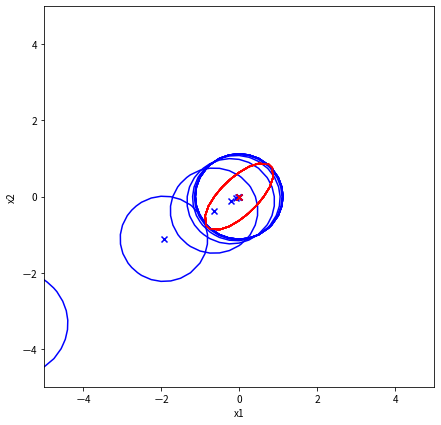

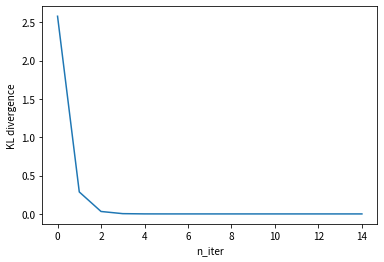

In [16]:
def calc_kl(mu1,sigma1,mu2,sigma2):
    kl = ((mu1-mu2)**2 +sigma2)/sigma1 + np.log(sigma1/sigma2) -1
    return 0.5*kl

def gaussian(x,mu,sigma):
    # 分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

# 真の分布pを定義
mu_truth = np.array([0,0])
sigma_truth = np.array([[1,0.7],[0.7,1]])

# 予測分布qの初期値を定義
theta = 2.0*np.pi/12
sigma = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

x2_init = -10
n_iter = 15 # 反復回数

m_list = []
m_list.append([0,x2_init])

# プロット用
x = np.arange(-5,5,0.25)
y = np.copy(x)
X,Y = np.meshgrid(x,y)
z = np.c_[X.ravel(),Y.ravel()]
Z = gaussian(z,mu_truth,sigma_truth)
Z = Z.reshape(X.shape)

kl_list = []
plt.figure(facecolor="white",figsize=(7,7))
for n in range(n_iter):
    prev_m = m_list[-1][:]
    m1 = mu_truth[0]-(sigma[0,1]/sigma[0,0])*(prev_m[1]-mu_truth[1])
    m2 = mu_truth[1]-(sigma[0,1]/sigma[1,1])*(m1-mu_truth[0])
    m_list.append([m1,m2])
    # KL divergence
    kl_list.append(calc_kl(m1,1/sigma[0,0],m2,1/sigma[1,1]))
    
    mu_new = np.array([m1,m2])
    sigma_new = np.array([[1/sigma[0,0],0],[0,1/sigma[1,1]]])
    Z_new = gaussian(z,mu_new,sigma_new)
    Z_new = Z_new.reshape(X.shape)
    # 予測分布の等高線と平均
    plt.contour(X,Y,Z_new,colors=['blue'],levels=1)
    plt.scatter(m1,m2,marker="x",color="blue")
    # 真の分布の等高線と平均
    plt.contour(X, Y, Z,colors=['red'],levels=1)
    plt.scatter(mu_truth[0],mu_truth[1],marker="x",color="red")
    #cont.clabel(fmt='%1.2f', fontsize=12)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

plt.figure(facecolor="white")
plt.plot(kl_list)
plt.xlabel("n_iter")
plt.ylabel("KL divergence")
plt.show()